

# **TWITTER SENTIMENT ANALYSIS USINNG LOGESTIC REGRASSION MODEL**

---



---





# ***IMPORTING NECESSARY LIBRARIES***

---



In [1]:
import pandas as pd

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re #Regular expressions
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import warnings 
warnings.filterwarnings("ignore")




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# ***LOADING THE DATASET***
---



In [2]:
train = pd.read_csv('/content/twitter_training.csv',header=None,names =['id','entity','sentiment','text'])
val = pd.read_csv('/content/twitter_validation.csv',header=None,names =['id','entity','sentiment','text'])



---



In [3]:
train_data = train
train_data

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
val_data = val
val_data

,id,entity,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# ***TEXT TRANSFORMATION***

---



In [5]:
#TEXT TRANSFORMATION TRAIN DATA

                  #Converting text to lowercase
train_data["clean_txt"]=train_data.text.str.lower()
train_data["clean_txt"]=[str(data) for data in train_data.clean_txt]

#Applying regular expressions to remove non-alphanumeric characters
train_data['clean_txt'] = train_data.clean_txt.apply(lambda x: re.sub(r'http\S+|www\.\S+|[^A-Za-z0-9 ]+', '', x))

In [6]:
#TEXT TRANSFORMATION VAL DATA
val_data['clean_txt']=val_data.text.str.lower()
val_data['clean_txt']=[str(data) for data in val_data.clean_txt]
val_data['clean_txt'] = val_data.clean_txt.apply(lambda x: re.sub(r'http\S+|www\.\S+|[^A-Za-z0-9 ]+', '', x))

In [ ]:
# Text Stemming using Porter Stemmer
stemmer = PorterStemmer()
train_data["clean_txt"] = train_data['clean_txt'].apply(lambda x: " ".join([stemmer.stem(token) for token in word_tokenize(x)]))
val_data["clean_txt"] = val_data['clean_txt'].apply(lambda x: " ".join([stemmer.stem(token) for token in word_tokenize(x)]))

In [ ]:
# Text Lemmatization using WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
train_data['clean_txt'] = train_data['clean_txt'].apply(lambda x: " ".join([lemmatizer.lemmatize(x)]))
val_data['clean_txt'] = val_data['clean_txt'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [ ]:
# Data Cleaning: Removing Missing Values and Duplicates

train_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)
val_data.dropna(inplace=True)
val_data.drop_duplicates(inplace=True)

In [ ]:
#DIFFERENCES IN TEXT
train_data.head()

,id,entity,sentiment,text,clean_txt
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get on borderland and i will murder you all
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am come to the border and i will kill you all
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get on borderland and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come on borderland and i will murder you all
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get on borderland 2 and i will murder you m...


In [ ]:
#DIFFERENCES IN TEXT
val_data.head()

,id,entity,sentiment,text,clean_txt
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mention on facebook that i wa struggl for mo...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezo reject claim com...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft whi do i pay for word when it functi...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmak is so full of closet hack it a t...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the presid is slap american in the face th...


# ***DATA EXPLORATION AND VISUALIZATION***

---



In [ ]:
 # COUNT OF SENTIMENTS BY ENTITY
count= train.groupby(by=["entity","sentiment"]). count() .reset_index()
count.head()

,entity,sentiment,id,text,clean_txt
0,Amazon,Irrelevant,185,185,185
1,Amazon,Negative,565,565,565
2,Amazon,Neutral,1197,1197,1197
3,Amazon,Positive,302,302,302
4,ApexLegends,Irrelevant,185,185,185


### **GENERATING WORDCLOUD TO VISUALIZE FREQUENT WORDS**




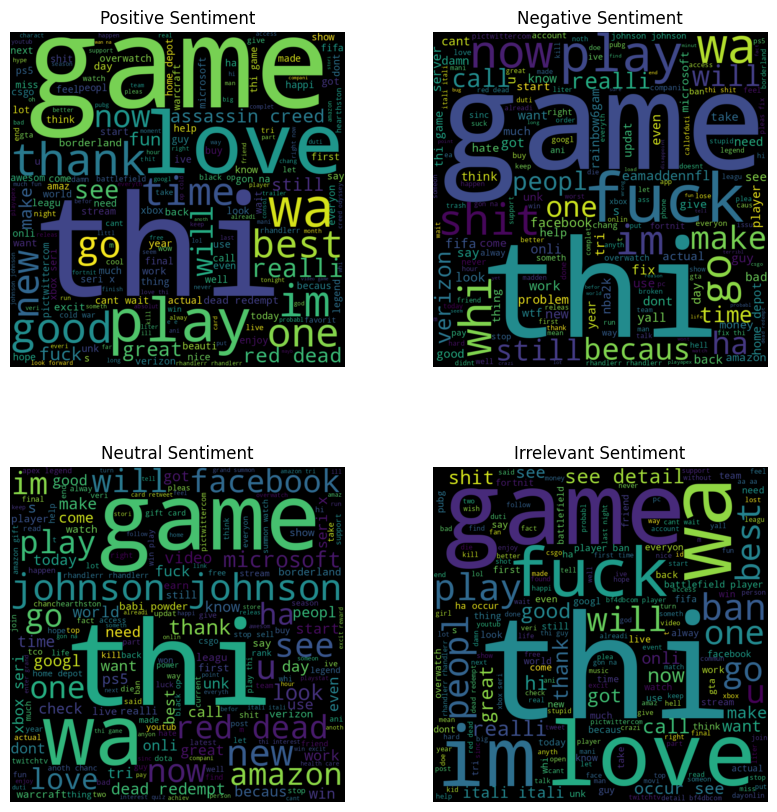

In [ ]:
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
text = []
for sentiment in sentiments:
    sentiment_text = ' '.join(train_data[train_data['sentiment'] == sentiment]['clean_txt'])
    text.append(sentiment_text)

# Create subplots for each sentiment word cloud
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Generate and plot word cloud for each sentiment
for i, sentiment in enumerate(sentiments):
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text[i])
    ax = axes[i//2, i%2]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(sentiment + ' Sentiment')
    ax.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

 
## ***ANALYZING  DISTRIBUTION OF SENTIMENTS THROUGH PIE & BAR CHART ***
---



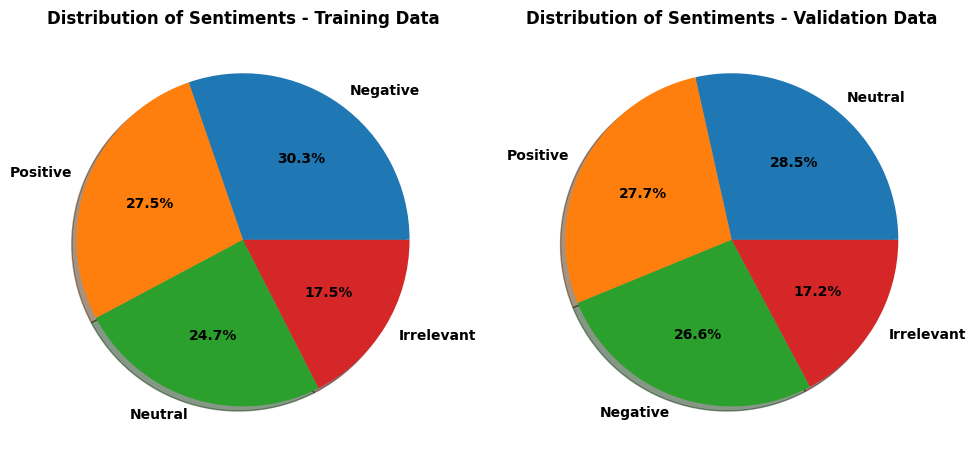

In [ ]:
plt.figure(figsize=(10, 5))

# Plot pie chart for training data
plt.subplot(1, 2, 1)
label_train = train_data['sentiment'].value_counts().index
label_count_train = train_data['sentiment'].value_counts().values
plt.pie(label_count_train, labels=label_train, autopct='%1.1f%%', shadow=True,textprops={'weight': 'bold'})
plt.title('Distribution of Sentiments - Training Data', fontweight='bold')

# Plot pie chart for validation data
plt.subplot(1, 2, 2)
label_val = val_data['sentiment'].value_counts().index
label_count_val = val_data['sentiment'].value_counts().values
plt.pie(label_count_val, labels=label_val, autopct='%1.1f%%', shadow=True,textprops={'weight': 'bold'})
plt.title('Distribution of Sentiments - Validation Data', fontweight='bold')

plt.tight_layout()
plt.show()

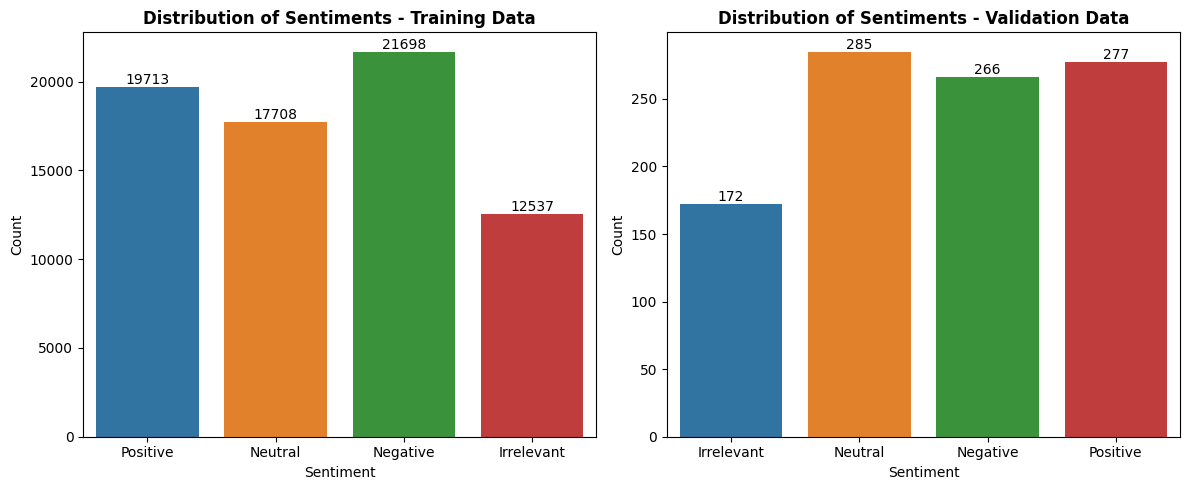

In [ ]:
plt.figure(figsize=(12, 5))

# Plot count plot for training data
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments - Training Data',fontweight='bold')

# Add count labels to each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot count plot for validation data
plt.subplot(1, 2, 2)
sns.countplot(data=val_data, x='sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments - Validation Data',fontweight='bold')

# Add count labels to each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Text Tokenization and Analysis: Counting Unique Tokens**




In [7]:
#TOKENIZATION :Breaking Text into Words or Tokens(Training data)
tokens_text = [word_tokenize(str(word)) for word in train_data.clean_txt]
tokens_counter =[item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  40171


In [8]:
#TOKENIZATION (Valadition data)
tokens_text = [word_tokenize(str(word)) for word in val_data.clean_txt]
tokens_counter =[item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  5422


In [ ]:
#STOPWORDS REMOVAL: Eliminating Common Words with little signnificance for Text Analysis

stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# **BAG-OF-WORDS(BOW) REPRESENTATION**

---



In [9]:
#CountVectorizer from scikit-learn is used to transform the text data into a bag-of-words representation
Bow_counts = CountVectorizer(
    tokenizer = word_tokenize, 
    ngram_range=(1,3))


In [ ]:
#With sotpwords(The accuracy is getting low as compared to without stopwords)
Bow_counts = CountVectorizer(
    tokenizer = word_tokenize,stop_words=stop_words,
    ngram_range=(1,3))

# **SPLITING DATA INTO TRAINING AND TESTING**

---



In [10]:
#The training dataset is split into training and testing sets using a 80:20 ratio.
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2,random_state=0)

# ***CONVERTING TEXT DATA INTO NUMERIC REPRESENTATION:DOCUMENT-TERM MATRICES***

---



In [11]:
#Transform the training data
X_train = Bow_counts.fit_transform(reviews_train.clean_txt)
Y_train = reviews_train['sentiment']

In [12]:
# Transform the testing data
X_test = Bow_counts.transform(reviews_test.clean_txt)
Y_test = reviews_test['sentiment']


In [13]:
#Transform the validation data
X_val = Bow_counts.transform(val_data.clean_txt)
Y_val = val_data['sentiment']

# ***LOGESTIC REGRESSION MODEL***

---





**MODEL TRAINING & PREDICTION**

In [ ]:
model = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=1000, random_state=0, solver='liblinear')

In [ ]:
train_pred = model.predict(X_test)
print('ACCURACY:',accuracy_score(Y_test,train_pred)* 100)

ACCURACY: 90.66424783700809


# ***EVALUATING MODEL ACCURACY ON VALADITION DATASET***

---



In [ ]:
val_pred = model.predict(X_val)
print('ACCURACY:',accuracy_score(Y_val,val_pred)* 100)

ACCURACY: 98.6


# ***PRINTING THE RESULTS***

---


In [ ]:
#Generating classification reports to assess precision, recall, and F1-score for each sentiment category(TEST DATA)
report = classification_report(Y_test,train_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.91      2535
    Negative       0.91      0.93      0.92      4306
     Neutral       0.92      0.89      0.90      3568
    Positive       0.86      0.93      0.89      3923

    accuracy                           0.91     14332
   macro avg       0.91      0.90      0.91     14332
weighted avg       0.91      0.91      0.91     14332



In [ ]:
#VALADIATION DATA
report = classification_report(Y_val, val_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.99      0.97      0.98       172
    Negative       0.99      0.99      0.99       266
     Neutral       0.99      0.99      0.99       285
    Positive       0.98      0.99      0.98       277

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000



# **Multinomial Naive Bayes Model**

---



In [14]:
model1 = MultinomialNB()
model1.fit(X_train, Y_train)

MultinomialNB()

In [16]:
#Evaluating Multinomial Naive Bayes Model on Test data
train_pred_nb = model1.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, train_pred_nb)*100)

Accuracy: 90.0850237664859


In [ ]:
report_nb = classification_report(Y_test, train_pred_nb)
print("Classification Report - Naive Bayes:")
print(report_nb)

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.84      0.91      2446
    Negative       0.86      0.95      0.90      4039
     Neutral       0.94      0.87      0.90      3203
    Positive       0.88      0.92      0.90      3444

    accuracy                           0.90     13132
   macro avg       0.91      0.90      0.90     13132
weighted avg       0.91      0.90      0.90     13132



In [18]:
#Evaluating Multinomial Naive Bayes Model on Validation Set
val_pred_nb= model1.predict(X_val)
print('Accuracy:',accuracy_score(Y_val, val_pred_nb)*100)

Accuracy: 97.1


In [19]:
report_nb = classification_report(Y_val, val_pred_nb)
print("Classification Report - Naive Bayes:")
print(report_nb)

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

  Irrelevant       0.99      0.95      0.97       172
    Negative       0.97      0.98      0.98       266
     Neutral       0.99      0.96      0.98       285
    Positive       0.94      0.98      0.96       277

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

